<module 'matplotlib.pyplot' from 'C:\\Users\\mattc\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

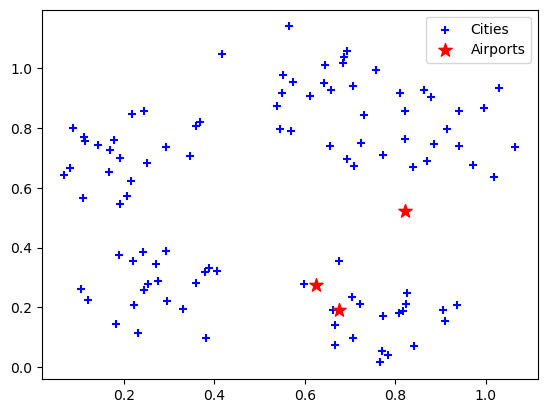

In [589]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []
alpha = 0.02
iterations = 20

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))

for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

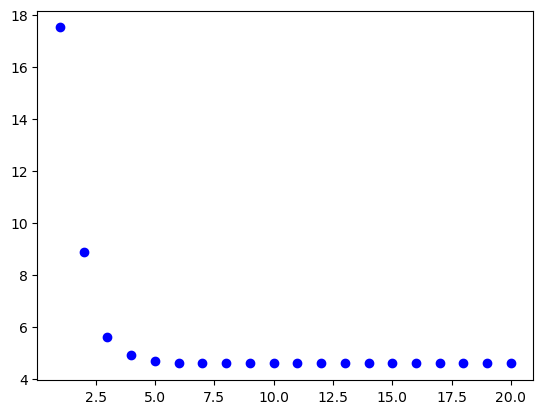

In [591]:
obj_vals = []

for iteration in range(iterations):
    #create Ci, the set of cities closest to airport i
    Ci = {}
    for i in range(0, len(airports)):
        Ci[i] = []
        
    for city in cities:
        min_dist = float('inf')
        closest = -1
        for i, airport in enumerate(airports):
            dist = (airport[0] - city[0])**2 + (airport[1] - city[1])**2
            if dist < min_dist:
                min_dist = dist
                closest = i
        Ci[closest].append(city)
    
    #calculate objective function and store its values
    distance = 0
    for i in range(len(airports)):  
        ax, ay = airports[i]
        for city in Ci[i]:
            cx, cy = city
            distance += (ax - cx)**2 + (ay - cy)**2
    obj_vals.append(distance)

    #calculate gradient vector and update airport positions
    for i, airport in enumerate(airports):
        grad_x = 0
        grad_y = 0
        for city in Ci[i]:
            grad_x += 2 * (airport[0] - city[0])
            grad_y += 2 * (airport[1] - city[1])
        airports[i] = (airport[0] - alpha * grad_x, airport[1] - alpha * grad_y)
plt.scatter([i for i in range(1, iterations + 1)], obj_vals, color='b')
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\mattc\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

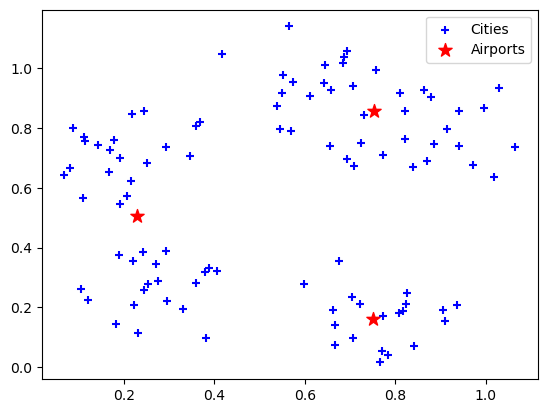

In [593]:
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt